## Construction of GGL and RAN3

In [1]:
import numpy as np
import random as rnd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def GGL(N=1, seed=100):
    # function to simulate U(0,1) random numbers using GGL algorithm
    # inputs:
    #    N: the number of simulated points
    #    seed: the starting point for the algorithm
    # output:
    #    a list of N U(0,1) distributed random numbers
    
    m = 2**31 - 1 # constant for modulo
    a = 16807 # coefficient
    
    x = seed # running "index" of the simulated sequence
    y = [] # list of simulated random numbers
    for i in range(N):
        x = a*x % m # calculate a new point
        y.append(x / m) # scale the new point and append to the list
    
    return y

def RAN3(N=1, seed=100):
    # function to simulate U(0,1) random numbers using RAN3 algorithm
    # inputs:
    #    N: the number of simulated points
    #    seed: the starting point for GGL algorithm to create the initial sequence
    # output:
    #    a list of N U(0,1) distributed random numbers
    
    
    # set constants for the algorithm
    r = 55
    s = 24
    m = 2**32
    
    x = GGL(r, seed=seed) # initial sequence of random numbers of length r
    y = [] # list of simulated random numbers
    
    for i in range(r, r+N, 1):
        x_i = (x[i-r] - x[i-s]) % m # calculate a new point
        x.append(x_i) # append the new observation to the sequence of simulated random numbers
        y.append(x_i/m) # append the scaled observation to the list
    
    return y

In [3]:
# verify the algorithms by simulating a sequence and computing the mean and the variance
x_GGL = GGL(100000)
print("Mean of GGL is " + str(np.mean(x_GGL)))
print("Variance of GGL is " + str(np.var(x_GGL)))

x_RAN3 = RAN3(100000)
print("Mean of RAN3 is " + str(np.mean(x_RAN3)))
print("Variance of RAN3 is " + str(np.var(x_RAN3)))

Mean of GGL is 0.5011791040177593
Variance of GGL is 0.08311243499347233
Mean of RAN3 is 0.49850386620030535
Variance of RAN3 is 0.08459711334640523


The estimates for the first moment and the second shifted moment from the generated random numbers correspond approximately to the values obtained for $U(0,1)$ distribution. The accuracy of the estimates improves by increasing the sample size. Thus, the two constructed random number generators seem to work.

## Comparison of different RNGs

In [22]:
N = 10**8 # not run on a local computer

# simulate the random number for the three different RNGs
sim_GGL = GGL(N)
print("GGL done")
sim_RAN3 = RAN3(N)
print("RAN3 done")
sim_RAND = [rnd.random() for i in range(N)]
print("RAND done")

GGL done
RAN3 done
RAND done


In [17]:
def filter_sim(sim, xA, xB):
    # function to construct two vectors of consecutive simulated random points
    # within a given interval [xA, xB]
    # inputs:
    #    sim: a list of simulated random numbers
    #    xA: start point of the filtering interval
    #    xB: end point of the filtering interval
    # outputs:
    #    xF: a numpy array of filtered points x_i from the given list
    #    yF: a numpy array of consecutive elements x_{i+1} for the filtered points x_i
    
    sim = np.array(sim)
    
    x = sim[0:-1]
    y = sim[1:]
    
    pred = [xi >= xA and xi <= xB for xi in x] # check which element fulfil the predicate
    ind = np.where(pred)[0]                    # find the indices of those elements
    
    xF = x[ind]
    yF = y[ind]
    
    return xF, yF

In [24]:
# select the interval and construct vectors for plotting
xA = 0.5
xB = 0.5003

x_GGL, y_GGL = filter_sim(sim_GGL, xA, xB)
x_RAN3, y_RAN3 = filter_sim(sim_RAN3, xA, xB)
x_RAND, y_RAND = filter_sim(sim_RAND, xA, xB)

print(len(x_GGL))
print(len(x_RAN3))
print(len(x_RAND))

30042
30018
30288


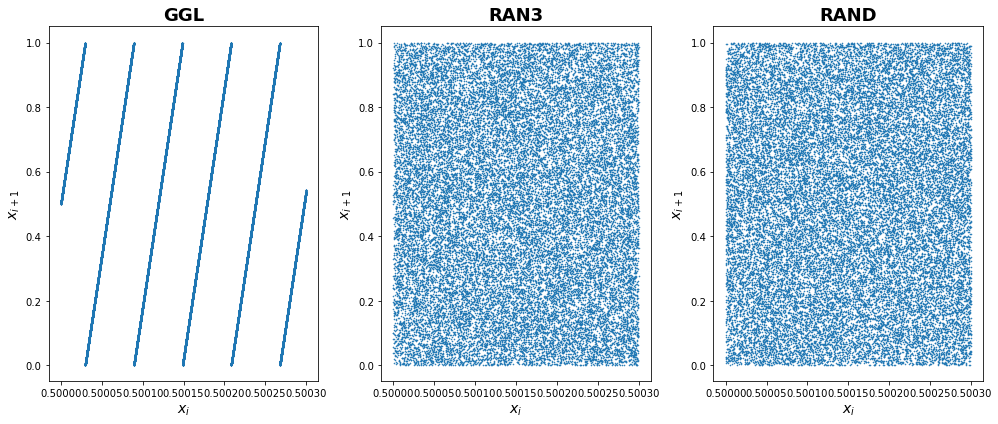

In [26]:
# construct three scatter plots of the obtained results

# parameters for plotting
title_size = 18
label_size = 14
marker_size = 1.3

# plotting
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(131)
ax.scatter(x_GGL, y_GGL, s=marker_size, marker = ".")
ax.set_xlabel(r'$x_i$', fontsize=label_size)
ax.set_ylabel(r'$x_{i+1}$', fontsize=label_size)
ax.set_title("GGL", size=title_size, fontweight="bold")

ax2 = fig.add_subplot(132)
ax2.scatter(x_RAN3, y_RAN3, s=marker_size, marker=".")
ax2.set_xlabel(r'$x_i$', fontsize=label_size)
ax2.set_ylabel(r'$x_{i+1}$', fontsize=label_size)
ax2.set_title("RAN3", size=title_size, fontweight="bold")

ax3 = fig.add_subplot(133)
ax3.scatter(x_RAND, y_RAND, s=marker_size, marker = ".")
ax3.set_xlabel(r'$x_i$', fontsize=label_size)
ax3.set_ylabel(r'$x_{i+1}$', fontsize=label_size)
ax3.set_title("RAND", size=title_size, fontweight="bold")

fig.tight_layout()

From the figure above, it can be seen that the consecutive points generated with GGL form equally spaced lines. This shows the correlation structure among linear congruential generators. The similar structure cannot be seen with RAN3 and RAND. Though the period of RAN3 is significantly smaller than that of Mersenne-Twister used in RAND, no correlation structure seems to appear between two consecutive points and both figures look equally random. 